In [40]:
#importing important libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv("C:\\Users\\user\\Documents\\Datasets\\Admission_Prediction.csv") # Reading the Data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
data['GRE Score'].fillna(data['GRE Score'].mean(),inplace=True)
data['TOEFL Score'].fillna(data['TOEFL Score'].mean(),inplace=True)
data['University Rating'].fillna(data['University Rating'].mode()[0],inplace=True)

In [12]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
x=data.drop(['Chance of Admit','Serial No.'],axis=1)
y=data['Chance of Admit']

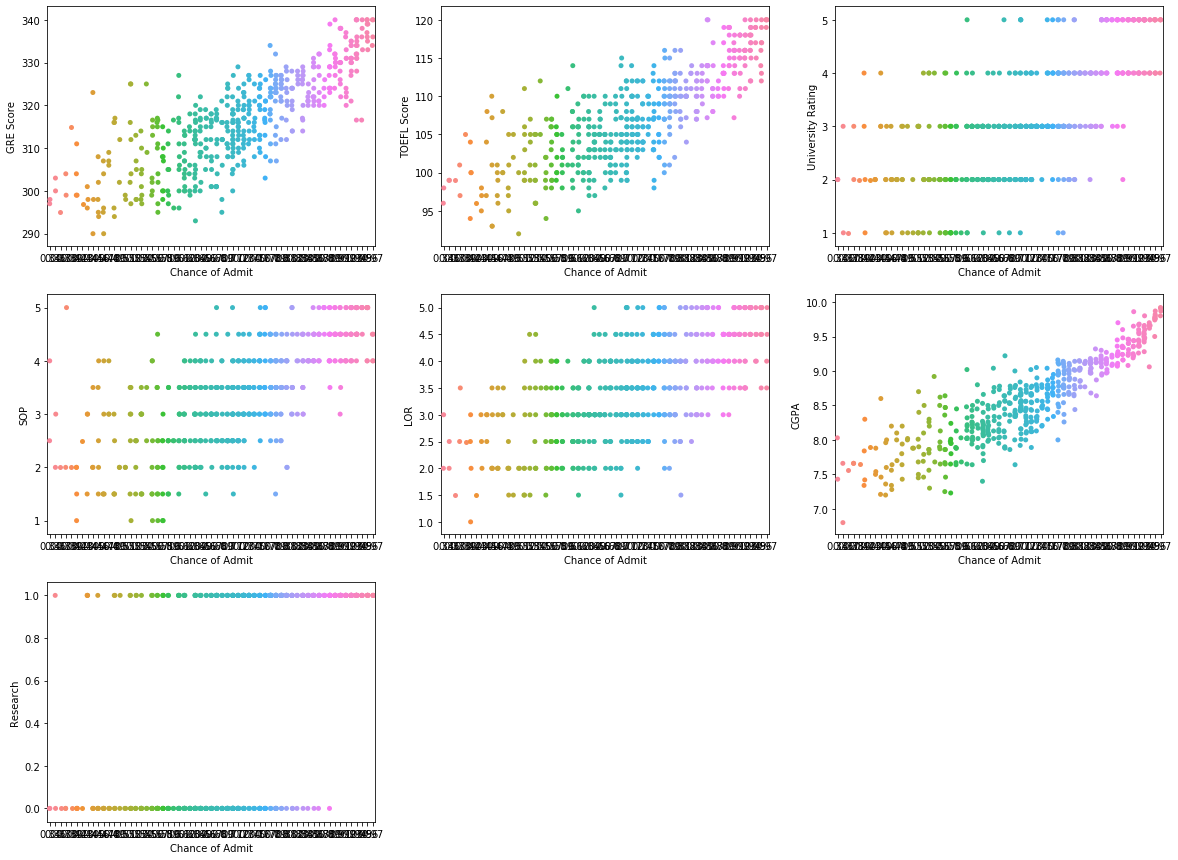

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=len(x) :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

In [14]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [20]:
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=355)

In [32]:
model = ensemble.GradientBoostingRegressor()
model.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
model.score(train_x,train_y)

0.9351956899263381

In [34]:
model.score(test_x,test_y)

0.7472462961092682

In [35]:
from sklearn.metrics import r2_score

In [38]:
y_pred=model.predict(test_x)

In [49]:
r2=r2_score(test_y,y_pred)
r2

0.7472462961092682

In [45]:
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [50]:
adj_r2(test_x,test_y,r2)

0.7347866064808518